### Ratings Prediction¶
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

#### Part 1 - Extraction

Import required libraires

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time

In [2]:
#connecting to web driver
driver = webdriver.Chrome(r"E:\fliprobo\chromedriver.exe")

connect to webdriver

In [10]:
driver=webdriver.Chrome('chromedriver.exe')

In [3]:
driver.get('https://www.flipkart.com/')

In [4]:
#Closing Pop-up
close_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
close_button.click()

In [5]:
# searching required fields
product=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
product.send_keys('laptops')

In [6]:
search_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [7]:
urls=[]
for page in range(25):
    for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
        urls.append(i.get_attribute('href'))
    nxt=driver.find_element_by_xpath('//a[@class="_1LKTO3"]')
    next1=nxt.get_attribute('href')
    driver.get(next1)

In [8]:
len(urls)

600

In [9]:
urls[:5]

['https://www.flipkart.com/asus-athlon-dual-core-3050u-4-gb-1-tb-hdd-windows-10-home-m515da-ej002ts-thin-light-laptop/p/itm4bbe3ec46fb8b?pid=COMGYFH7HMPR9KD7&lid=LSTCOMGYFH7HMPR9KD7Y4VBYQ&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=en_1MhuhnWEmvlUr4AztQY70Tgi0LzhAuHpUBa4r8eQrSjvWkqfgQh1ykXIv586wLXFIKnpkzk4EnXs7FkZsQaLzQ%3D%3D&ppt=hp&ppn=homepage&ssid=6k7ynl062o0000001622369584809&qH=c06ea84a1e3dc3c6',
 'https://www.flipkart.com/asus-rog-zephyrus-g15-2021-ryzen-7-octa-core-5800hs-16-gb-1-tb-ssd-windows-10-home-6-gb-graphics-nvidia-geforce-rtx-3060-165-hz-ga503qm-hq146ts-gaming-laptop/p/itmee7f2203df4bd?pid=COMG2DBS2WNEQZ45&lid=LSTCOMG2DBS2WNEQZ458EKJ9V&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=en_1MhuhnWEmvlUr4AztQY70Tgi0LzhAuHpUBa4r8eQrSiVGTQ2Z8PBi2%2BdTYyS3uZIYhu03HTmTN4UuZbHTBwLBQ%3D%3D&ppt=hp&ppn=homepage&ssid=6k7ynl062o0000001622369584809&qH=c06ea84a1e3dc3c6',

In [10]:
description=[]
Rating=[]
for j in urls:
    driver.get(j)
    try:
        desc=driver.find_element_by_xpath('//div[@class="t-ZTKy"]')
        description.append(desc.text)
    except NoSuchElementException as e:
        description.append('None')
    
    try:
        rating=driver.find_element_by_xpath('//div[@class="_3LWZlK _1BLPMq"]')
        Rating.append(rating.text)
    except NoSuchElementException as e:
        Rating.append('None')

In [11]:
Ratings = pd.DataFrame({}) # saving scraped data into dataframe.
Ratings['Review'] = description
Ratings['Rating'] = Rating
Ratings

,Review,Rating
0,Laptop is fully affordable and the thickness i...,5
1,None,None
2,It's a good laptop with no issue as such ! Scr...,5
3,pros:\n1. cooler boost keeps laptop reasonably...,4
4,Things that I would like to tell you about -\n...,5
...,...,...
595,Pros\nVery good build quality\nLooks very prem...,5
596,None,None
597,This is super fast laptop in the budget segmen...,5
598,I have been using it for the past 10 days and ...,5


In [12]:
Ratings.to_csv('review_rating.csv')

### Part 2 - Modelling

In [13]:
df=pd.read_csv('review_rating.csv')

In [14]:
df.head()

,Unnamed: 0,Review,Rating
0,0,Laptop is fully affordable and the thickness i...,5
1,1,None,None
2,2,It's a good laptop with no issue as such ! Scr...,5
3,3,pros:\n1. cooler boost keeps laptop reasonably...,4
4,4,Things that I would like to tell you about -\n...,5


In [16]:
df.shape

(600, 3)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  600 non-null    int64 
 1   Review      600 non-null    object
 2   Rating      600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [18]:
# Let's see how many Null Values are present
df.isnull().sum()

Unnamed: 0    0
Review        0
Rating        0
dtype: int64

In [19]:
# let's drop Unnamed column
df=df.drop(columns=["Unnamed: 0"], axis=1)

In [20]:
df.head()

,Review,Rating
0,Laptop is fully affordable and the thickness i...,5
1,None,None
2,It's a good laptop with no issue as such ! Scr...,5
3,pros:\n1. cooler boost keeps laptop reasonably...,4
4,Things that I would like to tell you about -\n...,5


In [21]:
df['Rating']=df['Rating'].str.replace('None', '1')

In [22]:
df["Rating"] = pd.to_numeric(df["Rating"])

In [23]:
# Let's see how our Target column is distributed
df['Rating'].value_counts()

5    348
4    155
1     56
3     41
Name: Rating, dtype: int64

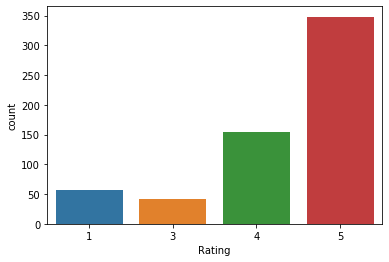

In [24]:
# Let's see how our Target column is distributed
import seaborn as sns
sns.countplot('Rating',data=df)

In [25]:
df['Review'] = df['Review'].str.lower()

In [26]:
df['Review']=df['Review'].str.replace('[^a-zA-z]',' ')

In [27]:
df['Review']=df['Review'].str.strip()

In [28]:
df['Review']=df['Review'].str.split()

In [29]:
df.head()

,Review,Rating
0,"[laptop, is, fully, affordable, and, the, thic...",5
1,[none],1
2,"[it, s, a, good, laptop, with, no, issue, as, ...",5
3,"[pros, cooler, boost, keeps, laptop, reasonabl...",4
4,"[things, that, i, would, like, to, tell, you, ...",5


In [30]:
#Removing Stopwords
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ct.pune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['Review']=df['Review'].apply(lambda x:[w for w in x if w not in stop])

In [32]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

In [33]:
df['Review']=df['Review'].apply(lambda x:[stemmer.stem(w)for w in x])

In [34]:
df.head()

,Review,Rating
0,"[laptop, fulli, afford, thick, fantast, super,...",5
1,[none],1
2,"[good, laptop, issu, screen, ip, good, view, a...",5
3,"[pro, cooler, boost, keep, laptop, reason, coo...",4
4,"[thing, would, like, tell, read, attent, info,...",5


In [35]:
df['Review']=df['Review'].apply(lambda x:" ".join(x))

In [36]:
df.head()

,Review,Rating
0,laptop fulli afford thick fantast super duper ...,5
1,none,1
2,good laptop issu screen ip good view angl batt...,5
3,pro cooler boost keep laptop reason cool displ...,4
4,thing would like tell read attent info display...,5


In [37]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

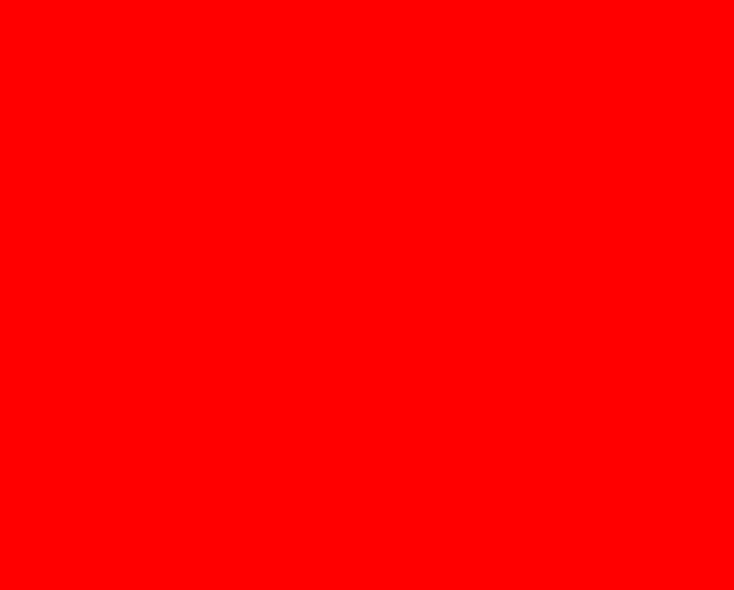

In [53]:
best = df['Review'][df['Rating'] == 5]
best_cloud = WordCloud(width=200,height=200,background_color='white',max_words=20).generate(' '.join(best))
plt.figure(figsize=(10,8),facecolor='r')
#plt.imshow(bad_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

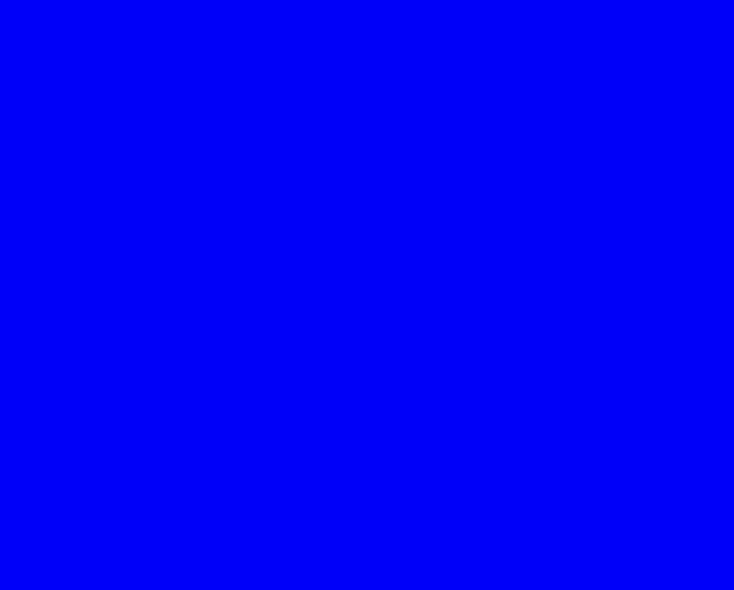

In [57]:
better = df['Review'][df['Rating']==4]

better_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(better))

plt.figure(figsize=(10,8),facecolor='b')
#plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

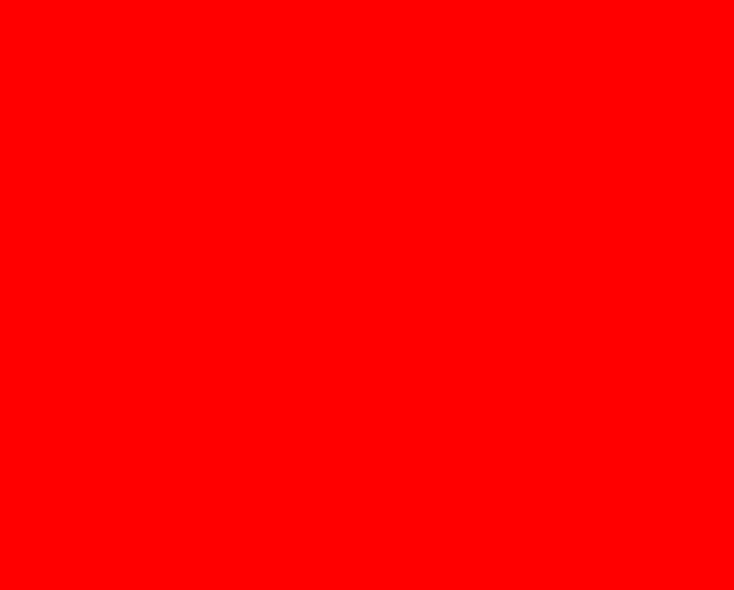

In [55]:
good = df['Review'][df['Rating']==3]

good_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(good))

plt.figure(figsize=(10,8),facecolor='r')
#plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

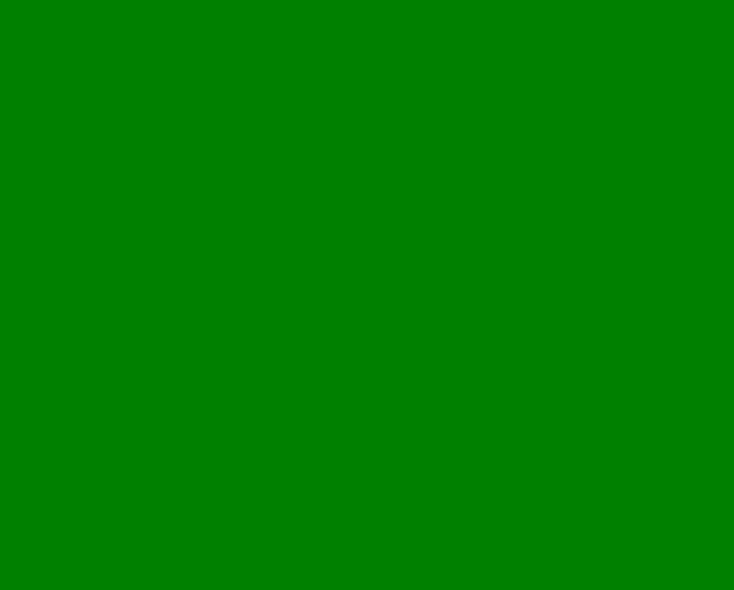

In [59]:
bad = df['Review'][df['Rating']==1]

bad_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(bad))

plt.figure(figsize=(10,8),facecolor='g')
#plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [42]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Review'])

X = features
y = df['Rating']
X.shape

(600, 602)

In [43]:
y.shape

(600,)

### Model Building

In [44]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()

In [45]:
# List of Models
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [46]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [47]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB() *****************************


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Max Accuracy Score corresponding to Random State  42 is: 1.0


Learning Score :  1.0
Accuracy Score :  1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00       104

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



Confusion Matrix:
 [[ 17   0   0   0]
 [  0  12   0   0]
 [  0   0  47   0]
 [  0   0   0 104]]


*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, 

C:\Users\ct.pune\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score})
scores.style.background_gradient()

,Model,Learning Score
0,MultinomialNB(),100.000000
1,DecisionTreeClassifier,100.000000
2,RandomForestClassifier,100.000000
3,AdaBoostClassifier,75.952381


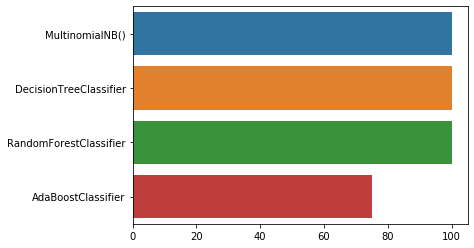

In [49]:
sns.barplot(y=Model,x=Acc_score)

#### Random Forest Classifier gives best results.

In [50]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
RF_pred=RF.predict(x_test)

In [52]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RF_pred
test               

,Rating,Predicted values
447,5,5
301,4,4
334,5,5
473,1,1
304,5,5
...,...,...
445,5,5
370,4,4
187,5,5
497,4,4
